# **CS985 and CS986 Assignment 1 : A classification problem**

## **Team's name: Group O**
*   Chavinpat Naimee (201976778) (CS985)
*   Chinnakrit Nitipornsri (201964692) (CS986)
*   Kittanon Na Nakhon (201964002) (CS986)
*   Nuallahong Silaung (201986533) (CS986)

## 1. The Objective :
The main analysis of this project is to predict the genre of a song (the broad category to which is belongs such as "rock", "pop", "blues" etc.). (The data comes from Classification problem: https://www.kaggle.com/t/38bfabc24c8942d1802d2214522a3249)

## 2. Meaning of dataset :
This dataset consists with two datasets of train and test dataset, which indicates the data of 453 rows 15 columns and 114 rows 14 columns respectively. However, the missing column of test dataset is "top genre", which is the key finding of this project.

*   Id - an arbitrary unique track identifier
*   title - track title
*   artist - singer or band
*   year - year of release (or re-release)
*   bpm - beats per minute (tempo)
*   nrgy - energy: the higher the value the more energetic
*   dnce - danceability: the higher the value, the easier it is to dance to this song
*   dB - loudness (dB): the higher the value, the louder the song
*   live - liveness: the higher the value, the more likely the song is a live recording
*   val - valence: the higher the value, the more positive mood for the song
*   dur - duration: the length of the song
*   acous - acousticness: the higher the value the more acoustic the song is
*   spch - speechiness: the higher the value the more spoken word the song contains
*   pop - popularity: the higher the value the more popular the song is
*   top genre - genre of the track (and the target variable for this problem)


## 3. Overall analysis :

#### 3.1 Data Exploding
*   Starting with import libralies and datasets
*   Providing an overview of information of both datasets
*   Reflection on Data Exploding

#### 3.2 Discover and visualise the Data to Gain Insights
*   Feature Selection
*   Looking for Correlations
*   Reflection on Discover and visualise the Data to Gain Insights

#### 3.3 Prepare the Data for Machine Learning Algorithms
*   Apply feature to dataset
*   Data normalisation
*   Encoding
*   Reflection on Prepare the Data for Machine Learning Algorithms

#### 3.4 Machine Learning Analysis Models for training set
###### 3.4.1 Splitting the train data and segment test data
###### 3.4.2 Running Models
- Logistic regression
- Support Vector Machines
   - Nonlinear SVM Classification
- Decision Trees
- Random Forest
- Voting Classification

###### 3.4.3 Apply using word to training model

###### 3.4.4 Reflection on Machine Learning Analysis

## 4. Conclusion
#### Required packages
*   import numpy as np
*   import pandas as pd
*   import seaborn as sns
*   import matplotlib.pyplot as plt
*   from sklearn.linear_model import LogisticRegression
*   from sklearn.metrics import accuracy_score
*   from pandas.plotting import scatter_matrix
*   from scipy import stats
*   import sklearn
*   import warnings
*   warnings.filterwarnings("ignore")
*   from sklearn.preprocessing import MinMaxScaler,LabelEncoder
*   from sklearn.model_selection import train_test_split,cross_val_score, KFold
*   from sklearn.svm import LinearSVC, SVC
*   importing one hot encoder from sklearn
*   from sklearn import model_selection, preprocessing
*   from sklearn.preprocessing import scale
*   from sklearn.pipeline import Pipeline
*   from sklearn.preprocessing import StandardScaler
*   from sklearn.tree import DecisionTreeClassifier
*   from sklearn.ensemble import RandomForestClassifier
*   from sklearn.ensemble import VotingClassifier
*   import re
*   import nltk
*   from nltk.stem import PorterStemmer
*   from sklearn.feature_extraction.text import TfidfVectorizer 

# **3.1 Data Exploding**

In terms of running on google colab. This stage is connected and loaded data through Kaggle.

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aimmyy","key":"02d33fa5c51961209742b72f3326881d"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [84]:
!pip install kaggle

In [85]:
!kaggle competitions download -c cs98xspotifyclassification

CS98XClassificationTrain.csv: Skipping, found more recently modified local copy (use --force to force download)
CS98XClassificationTest.csv: Skipping, found more recently modified local copy (use --force to force download)


##### 3.1.1 Starting with import libralies and datasets

In [0]:
import numpy as np    # Implemennts milti-dimensional array and matrices
import pandas as pd  # for data manipulation and analysis
import seaborn as sns   # provides a high-level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt   # Python 2D plotting library and it's numerical mathematics extension NumPy

In [0]:
# Read training & test datasets by pandas package
train = pd.read_csv("CS98XClassificationTrain.csv")
test = pd.read_csv("CS98XClassificationTest.csv")

##### 3.1.2 Providing an overview of information of both datasets

In [88]:
# To show 10 first order of dataset
test.head(10)

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,454,Pump It,The Black Eyed Peas,2005,154,93,65,-3,75,74,213,1,18,72
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,161,39,30,-15,11,14,292,26,3,59
2,456,We Are The Champions - Remastered 2011,Queen,1977,64,46,27,-7,12,18,179,38,3,76
3,457,Insomnia - Radio Edit,Faithless,2010,127,92,71,-9,37,53,216,6,4,50
4,458,This Eve of Parting,John Hartford,2018,115,46,56,-12,21,34,153,18,3,44
5,459,You Keep Me Hangin On,Kim Wilde,1986,123,68,69,-12,14,71,255,8,3,60
6,460,Mandy,Barry Manilow,1974,104,46,31,-9,14,32,213,42,3,69
7,461,Collette,Billy Fury,1982,155,44,55,-10,10,73,112,82,4,27
8,462,Against All Odds (Take a Look at Me Now) - 201...,Phil Collins,2016,116,50,58,-7,13,11,206,20,3,74
9,463,Highway to Hell,AC/DC,1979,116,91,57,-5,16,42,208,6,13,83


In [89]:
# Print shape of train set
train.shape

(453, 15)

In [90]:
# To get Number of columns, Index, Datatype and Memory information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
Id           453 non-null int64
title        453 non-null object
artist       453 non-null object
year         453 non-null int64
bpm          453 non-null int64
nrgy         453 non-null int64
dnce         453 non-null int64
dB           453 non-null int64
live         453 non-null int64
val          453 non-null int64
dur          453 non-null int64
acous        453 non-null int64
spch         453 non-null int64
pop          453 non-null int64
top genre    438 non-null object
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [91]:
# To find and count 'NaN' in datasat
train.isnull().sum()

Id            0
title         0
artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
top genre    15
dtype: int64

In [0]:
train = train.dropna()

In [93]:
train.isnull().sum()  # To find 'NaN' in data (find noise)

Id           0
title        0
artist       0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
top genre    0
dtype: int64

In [94]:
test.isnull().sum()  # To find 'NaN' in data (find noise)

Id        0
title     0
artist    0
year      0
bpm       0
nrgy      0
dnce      0
dB        0
live      0
val       0
dur       0
acous     0
spch      0
pop       0
dtype: int64

In [95]:
train.describe()

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,227.600457,1990.881279,118.326484,60.504566,59.780822,-8.787671,17.605023,59.625571,228.267123,32.191781,5.671233,61.557078
std,130.463047,16.697047,25.175735,22.089660,15.404757,3.591005,13.807492,24.480160,63.426812,29.279912,5.571392,12.759353
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,116.250000,1976.000000,100.000000,44.000000,50.000000,-11.000000,9.000000,42.250000,184.500000,7.000000,3.000000,54.000000
50%,226.500000,1993.000000,120.000000,64.000000,62.000000,-8.000000,13.000000,61.000000,224.000000,23.000000,4.000000,64.000000
75%,340.750000,2006.000000,133.000000,78.000000,70.750000,-6.000000,23.000000,80.000000,264.000000,57.000000,6.000000,72.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,99.000000,47.000000,84.000000


In [96]:
# To show 10 first order of test dataset
test.head(10)

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,454,Pump It,The Black Eyed Peas,2005,154,93,65,-3,75,74,213,1,18,72
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,161,39,30,-15,11,14,292,26,3,59
2,456,We Are The Champions - Remastered 2011,Queen,1977,64,46,27,-7,12,18,179,38,3,76
3,457,Insomnia - Radio Edit,Faithless,2010,127,92,71,-9,37,53,216,6,4,50
4,458,This Eve of Parting,John Hartford,2018,115,46,56,-12,21,34,153,18,3,44
5,459,You Keep Me Hangin On,Kim Wilde,1986,123,68,69,-12,14,71,255,8,3,60
6,460,Mandy,Barry Manilow,1974,104,46,31,-9,14,32,213,42,3,69
7,461,Collette,Billy Fury,1982,155,44,55,-10,10,73,112,82,4,27
8,462,Against All Odds (Take a Look at Me Now) - 201...,Phil Collins,2016,116,50,58,-7,13,11,206,20,3,74
9,463,Highway to Hell,AC/DC,1979,116,91,57,-5,16,42,208,6,13,83


In [97]:
# Print shape of test set
test.shape

(113, 14)

In [98]:
# To get Number of columns, Index, Datatype and Memory information
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 14 columns):
Id        113 non-null int64
title     113 non-null object
artist    113 non-null object
year      113 non-null int64
bpm       113 non-null int64
nrgy      113 non-null int64
dnce      113 non-null int64
dB        113 non-null int64
live      113 non-null int64
val       113 non-null int64
dur       113 non-null int64
acous     113 non-null int64
spch      113 non-null int64
pop       113 non-null int64
dtypes: int64(12), object(2)
memory usage: 12.5+ KB


In [99]:
test.describe()

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,510.415929,1990.646018,122.778761,61.017699,58.973451,-8.911504,20.247788,58.628319,226.212389,31.185841,6.283186,62.575221
std,33.187973,16.611055,26.021878,23.003099,15.079231,3.933731,16.815454,24.234787,60.903092,30.075366,6.620408,11.937939
min,454.000000,1945.000000,64.000000,6.000000,26.000000,-22.000000,2.000000,11.000000,112.000000,0.000000,3.000000,27.000000
25%,482.000000,1978.000000,106.000000,44.000000,50.000000,-11.000000,10.000000,39.000000,184.000000,5.000000,3.000000,56.000000
50%,510.000000,1991.000000,121.000000,61.000000,58.000000,-8.000000,14.000000,62.000000,215.000000,20.000000,4.000000,65.000000
75%,539.000000,2006.000000,137.000000,80.000000,69.000000,-6.000000,24.000000,80.000000,264.000000,51.000000,6.000000,71.000000
max,567.000000,2019.000000,191.000000,98.000000,94.000000,-1.000000,90.000000,98.000000,444.000000,97.000000,47.000000,83.000000


##### 3.1.3 Reflection on Data Exploding
The dataset structure provides rows and columns in the dataset, which represents one district provided 15 attributes including Id, title, artist, year, bpm, nrgy, dnce, dB, live, val, dur, acous, spch, pop and top_genre. Moreover, there are 453 instances in the training set and 113 instances in a testing set, which seems to be a small amount of data. From the table, it can be seen that top_genre attribute has only 438 non-null values, meaning that 15 districts are missing this feature. Find and count the amount of missing value in train dataset. Therefore, managing with missing values by dropped missing value. To clean the dataset, which is not a large dataset. The project can drop missing district values for the train dataset. Moreover, to make sure that there is no missing feature by using train.isnull().sum() to check the train and test dataset, and it can be seen that train dataset does not have any missing feature. Furthermore, use train.describe() to present a summary of the numerical attribute that shows the self-explanatory value such as count, mean, min, and max as well as the std row that shows the standard deviation to illustrate a result of how dispersed the values are. The 25%, 50%, and 75% in the table represent the corresponding percentiles. Besides, follow the same step to the test dataset by choosing the first 10 rows to check the overall in test dataset before using test.info(). There are 113 instances in test dataset, and it can be seen that it has not missed data. Lastly, show the summary table of a test dataset by test.describe to check the basic statistic for the numerical attribute.

# **3.2 Discover and Visualise the Data to Gain Insights**

###### 3.2.1 Feature Selection

The Feature engineering technique is an important process that impacts the efficiency of the model. The priority feature of each attribute in dataset could be found by using the feature importance property of the model. This technique would provide a score for each feature of the data, which the higher score provide the more important or relevant ,and towards a variable output.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, This will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.12184991 0.08481268 0.09278181 0.08866209 0.08511508 0.07801529
 0.08422364 0.09997631 0.09573591 0.07280597 0.09602129]


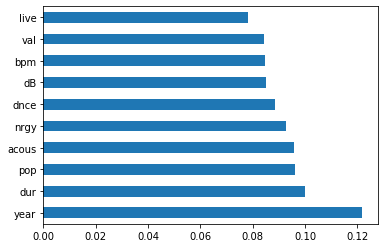

In [100]:
X = train.iloc[:,3:14]  #independent columns
y = train.iloc[:,-1]    #target column i.e top genre
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

##### 3.3.2 Looking for Correlations
The pair plot and heatmap is a 2-dimensional method of representing the data. The pair plotting illustrates a correlation two relationship between two attributes, which can indicate whether or not the pairs of variables are strongly related. Moreover, the heatmap provides data values that represented in the graph as colors. The heatmap aims to provide a vivid visual information description.

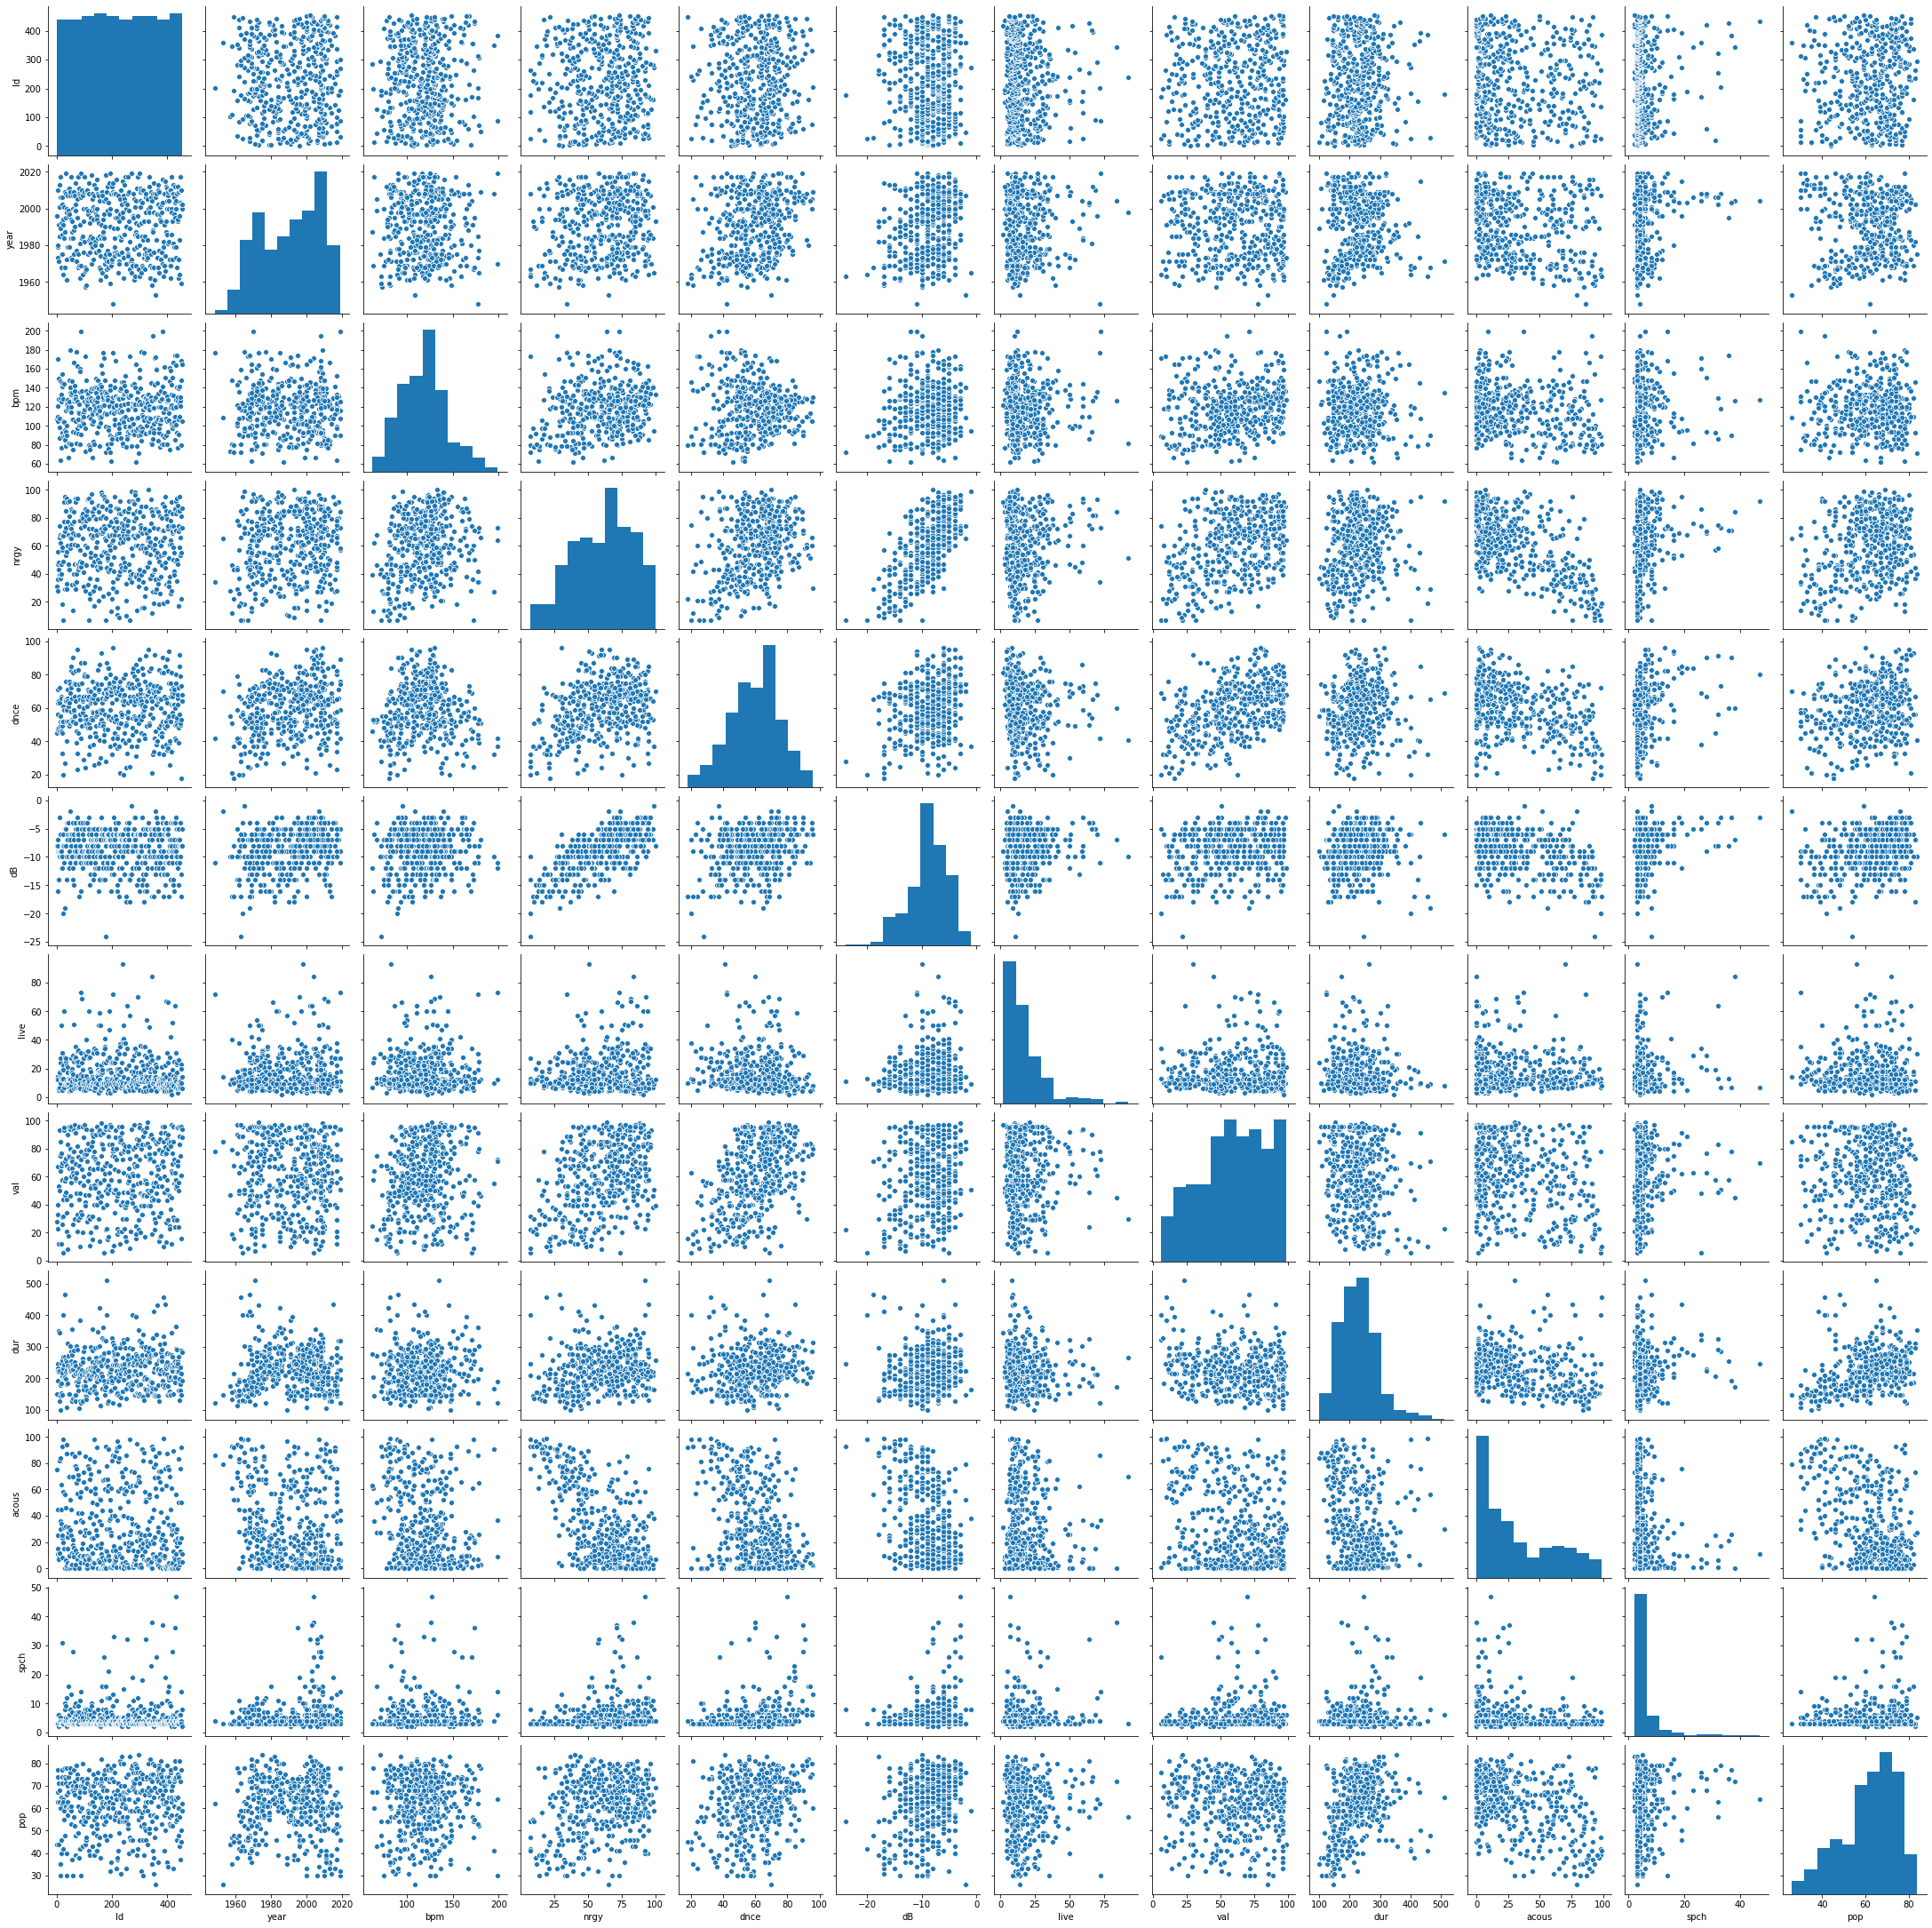

In [101]:
# plot scatter of dataset
sns.pairplot(train)

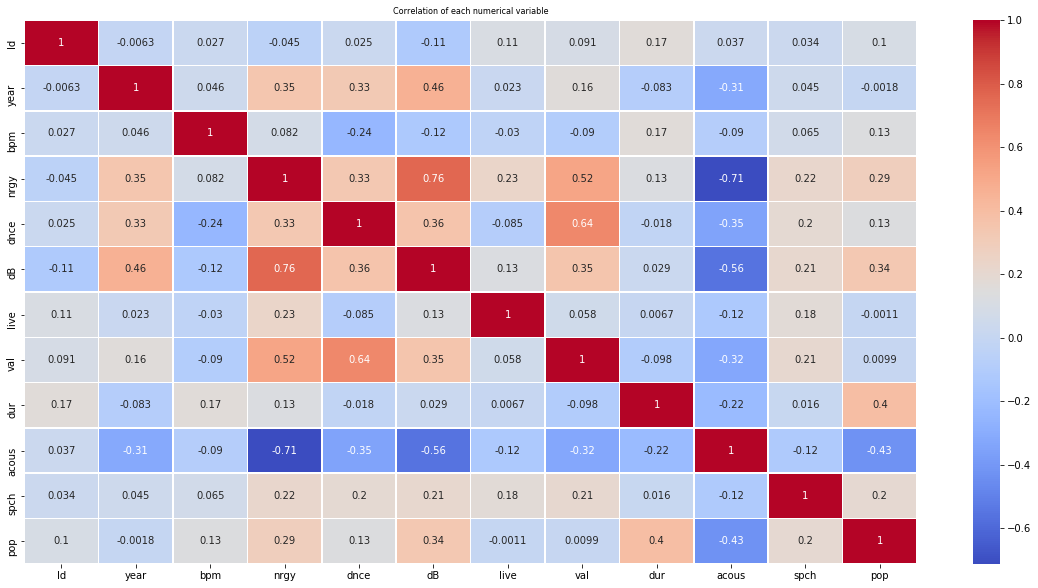

In [102]:
# Plot a heatmap showing the correlation between each numerical variable

plt.figure(figsize=(20,10))      #  fix size of chart
corr = test.corr()      #  find correlation
sns.heatmap(corr,annot=True, linewidths=.5, cmap="coolwarm")     #  plot heatmap
plt.title('Correlation of each numerical variable', size = 8)
plt.show()

##### 3.2.3 Reflection on Discover and visualise the Data to Gain Insights


According to the feature selection bar graph shows the highest importance score feature that used in the model in the next step. Moreover, the pair plot visualisation provides that the relationship between data has a high variance of the distribution. Therefore, the heatmap is required to find the correlation as a value, also a different shade of colour. The result shows that the highest positive correlation is dur the highest negative correlation is acous. Therefore, this project can eliminate the attribute of year, which is the worst correlation in the dataset.

# **3.3 Prepare the Data for Machine Learning Algorithms**


######3.3.1 Apply feature to dataset

In [0]:
import sklearn   #  import tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction
from sklearn import model_selection, preprocessing  # import model selection and preprocessing
from sklearn.preprocessing import scale  # import data normalise tool
from sklearn.model_selection import train_test_split   # to divide dataset into train and test set

In [0]:
# first create test and train dataset

X_num = train.loc[:,['year','nrgy','dur','acous','pop']].values
Y_num = train.loc[:,'top genre'].values
X_test_num = test.loc[:,['year','nrgy','dur','acous','pop']].values

###### 3.3.2 Data normalisation

In [0]:
# Normalised numerical data in dataset and testset
X_num = preprocessing.scale(X_num)
X_test_num = preprocessing.scale(X_test_num)

###### 3.3.3 Encoding
one problem with this representation is that Machine Learning algorithms concluded that two neighbouring values are much more identical than two distant values. To solve this, the input of this transformer must be an array of entities or strings that denotes the values assumed by categorical (discrete) features. The functions are encoded using a single-hot encoding scheme (known as 'one-of-K' or 'dummy'), which generates a binary column for each group and gives a sparse matrix or dense array. Thus, this OneHotEncoder might give a better report for this project.

The 'artist' feature will be applied when training the model. Before using the text feature, encoder need to be change a text variable to be a numerical class using one hot encoder. The artist will be considered to use because the same artist looks like to produce the similar genre of song.

In [0]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 

train_artist = train[["artist"]]
train_artist = train_artist.values
test_artist = test[["artist"]]
test_artist = test_artist.values

data_artist = np.concatenate((train_artist,test_artist),axis=0)
# creating one hot encoder object by default 
# data passed is one hot encoded 

one_encoder = OneHotEncoder()
artist_1hot = one_encoder.fit_transform(data_artist)
artist_1hot = artist_1hot.toarray()

train_artist_1hot = artist_1hot[0:train.shape[0],:]
test_artist_1hot = artist_1hot[train.shape[0]:,:]

In [0]:
#connect between numerical variables and text variables (one hot encoder)
X = np.concatenate((X_num,train_artist_1hot),axis=1)
Y = Y_num.copy()
X_test = np.concatenate((X_test_num,test_artist_1hot),axis=1)

###### 3.3.4 Reflection on Prepare the Data for Machine Learning Algorithms

According to feature selection part, it found the highest importance score features are year, nrgy, dur, acous and pop so they are applied with both train dataset and test dataset. Moreover, there is processing data normalisation. At the last, encoding data that two nearby values are more similar than two distant values by using OneHotEncoder() function.

# **3.4 Machine Learning Analysis Models for training set**

According to the obstruction of the testing dataset that has no target column of top genre, then the training dataset has to be used as both training and testing. However, the evaluation of a model skill only the training dataset would result in a biased score. To avoid prediction bias, the dataset has to split into three datasets that are training, validation and testing set.

The training set is used for learning, that is to fit the parameters of the classification.
The validation set is used to tune the parameters of the classification.
The test set is used only to assess the performance of a fully-specified classification.
There is seperate data to train data and test data as 70% and 30%

###### 3.4.1 Splitting the train data and segment test data

In [0]:
# Segment the data in a training and test set with a 70/30 split
X_train, X_valid, Y_train, Y_valid = sklearn.model_selection.train_test_split(X, Y, test_size=0.30)

#####3.4.2 Running Models

This part is finding the best model to classify the top genre that was conducted by 5 models
- Logistic Regression is linear classifier which is generally used for binary classification tasks but this case is multi-class classification task. That is, 86 separate binary classifiers are trained. During test time, the class with the highest probability from among the 86 classifiers is chosen as the predicted class. It is commonly used to estimate the probability that an instance belongs to a particular class. If the estimated probability is
greater than 50%, then the model predicts that the instance belongs to that class, or else it predicts that it does not
- Support Vector Machine (SVM) transform the original input data into a high dimensional space using a kernel trick (Cortes and Vapnik, 1995). This part used nonlinear SVM to predict process. It is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification.
- Decision Trees can also estimate the probability that an instance belongs to a particular class k: first it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class k in this node.
- Random Forest is the more complex algorithm that was improved from Decition Tree. This is a powerful model but it still create a hugh over-fitting.
- Voting Classification is an ensemble method which is a methodology to aggregate the predictions of a group of predictors to get better predictions than with the best individual predictor.

###### Logistic regression

In [109]:
# Logistic regression
from sklearn.linear_model import LogisticRegression  # import logistic regression
from sklearn.metrics import accuracy_score

# fit logistic regression model
lm = LogisticRegression()  # call logistic regression algorithm
lm.fit(X_train, Y_train)   # train the algorithm

# predict outcome of input variables
predictions_train = lm.predict(X_train)
predictions_valid = lm.predict(X_valid) 
predictions_test = lm.predict(X_test)  

print('The accuracy score of training set using Logistic Regression equal to',accuracy_score(Y_train, predictions_train))
print('The accuracy score of validation set using Logistic Regression equal to',accuracy_score(Y_valid, predictions_valid))
#print(metrics.classification_report(Y_valid, predictions_valid))  # print  precision, recall, f1-score and support
#print(metrics.confusion_matrix(Y_valid, predictions_valid))  # print confusion matrix

The accuracy score of training set using Logistic Regression equal to 0.5882352941176471
The accuracy score of validation set using Logistic Regression equal to 0.32575757575757575


###### Support Vector Machines

In [110]:
from sklearn.svm import SVC

# fit SVM model
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, Y_train) 

# predict outcome of input variables
predictions_train = svm_clf.predict(X_train)
predictions_valid = svm_clf.predict(X_valid)  
predictions_test = svm_clf.predict(X_test)  

print('The accuracy score of training set using SVM classification equal to',accuracy_score(Y_train, predictions_train))
print('The accuracy score of validation set using SVM classification equal to',accuracy_score(Y_valid, predictions_valid))

The accuracy score of training set using SVM classification equal to 0.9673202614379085
The accuracy score of validation set using SVM classification equal to 0.42424242424242425


###### Nonlinear SVM Classification

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

#fit model
poly_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=2, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X_train, Y_train)

# predict outcome from of input variables
predictions_train = poly_kernel_svm_clf.predict(X_train)
predictions_valid = poly_kernel_svm_clf.predict(X_valid)  
predictions_test = poly_kernel_svm_clf.predict(X_test)  

print('The accuracy score of training set using polynomial SVM equal to',accuracy_score(Y_train, predictions_train))
print('The accuracy score of validation set using polynomial SVM equal to',accuracy_score(Y_valid, predictions_valid))

The accuracy score of training set using polynomial SVM equal to 1.0
The accuracy score of validation set using polynomial SVM equal to 0.49242424242424243


###### Decision Tree

In [112]:
from sklearn.tree import DecisionTreeClassifier

# fit decision tree model
decition_tree_clf = DecisionTreeClassifier(max_depth=5)
decition_tree_clf.fit(X_train, Y_train)

# predict outcome of input variables
predictions_train = decition_tree_clf.predict(X_train)
predictions_valid = decition_tree_clf.predict(X_valid)  
predictions_test = decition_tree_clf.predict(X_test)  

print('The accuracy score of training set using Decision Tree equal to',accuracy_score(Y_train, predictions_train))
print('The accuracy score of validation set using Decision Tree equal to',accuracy_score(Y_valid, predictions_valid))

The accuracy score of training set using Decision Tree equal to 0.4934640522875817
The accuracy score of validation set using Decision Tree equal to 0.25


###### Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

#fit random forest model
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, Y_train)

# predict outcome of input variables
predictions_train = forest_clf.predict(X_train)
predictions_valid = forest_clf.predict(X_valid)  
predictions_test = forest_clf.predict(X_test)  

print('The accuracy score of training set using Decision Tree equal to',accuracy_score(Y_train, predictions_train))
print('The accuracy score of validation set using Decision Tree equal to',accuracy_score(Y_valid, predictions_valid))

The accuracy score of training set using Decision Tree equal to 1.0
The accuracy score of validation set using Decision Tree equal to 0.3560606060606061


###### Voting Classification

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# create model variable
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
polysvm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=2, coef0=1, C=5))
])
dt_clf = DecisionTreeClassifier(max_depth=5)
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf),('polysvm', polysvm_clf),('dt', dt_clf)],
voting='hard')

# fit voting model
voting_clf.fit(X_train, Y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [115]:
# predict outcome of input variables from each model
for clf in (log_clf, rnd_clf, svm_clf,polysvm_clf, dt_clf, voting_clf):
  clf.fit(X_train, Y_train)
  predictions_train = clf.predict(X_train)
  print('Accuracy of traning set using',clf.__class__.__name__,'equal to', accuracy_score(Y_train, predictions_train))

  predictions_valid = clf.predict(X_valid)
  print('Accuracy of validation set using',clf.__class__.__name__,'equal to', accuracy_score(Y_valid, predictions_valid))

  predictions_test = clf.predict(X_test)

Accuracy of traning set using LogisticRegression equal to 0.5882352941176471
Accuracy of validation set using LogisticRegression equal to 0.32575757575757575
Accuracy of traning set using RandomForestClassifier equal to 1.0
Accuracy of validation set using RandomForestClassifier equal to 0.36363636363636365
Accuracy of traning set using SVC equal to 0.4738562091503268
Accuracy of validation set using SVC equal to 0.2803030303030303
Accuracy of traning set using Pipeline equal to 1.0
Accuracy of validation set using Pipeline equal to 0.49242424242424243
Accuracy of traning set using DecisionTreeClassifier equal to 0.4934640522875817
Accuracy of validation set using DecisionTreeClassifier equal to 0.25
Accuracy of traning set using VotingClassifier equal to 0.6601307189542484
Accuracy of validation set using VotingClassifier equal to 0.3484848484848485


#### 3.4.3 Apply using word to training model

In this section, 'title' feature will be used to train the model, because there is a possibility that some specific word that appear in each name of many song may be the same genre, such as rock, love, etc.

This part will do the word clearning, remove special character and stop words, and split the word, then count words that appear in each title. After that, compute the tfidf from word count. This method can be done by using 'TfidfVectorizer' build-in function.

It was considered that the most effective 20 words will be used to train in this model.

In [122]:
import re
import nltk
import pandas as pd
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer 

#concatenate a feature "title" of Train and Test set
train_title = train[["title"]]
train_title = train_title.values
test_title = test[["title"]]
test_title = test_title.values
data_title = np.concatenate((train_title,test_title),axis=0)

# init stemmer
porter_stemmer=PorterStemmer()
 
def preprocesing_text(text):
    
    text=text.lower() 
    text=re.sub("\\W"," ",text) # remove special chars
    text=re.sub("\\s+(in|the|all|for|and|on)\\s+"," _connector_ ",text) # normalize certain words
    
    # stem words
    words=re.split("\\s+",text)
    stemmed_words=[porter_stemmer.stem(word=word) for word in words]
    return ' '.join(stemmed_words)
 
cv = TfidfVectorizer(preprocessor=preprocesing_text,stop_words=["all","in","the","is","and",'the','a','an','and','but','if','or','because','as','what','which','this','that','these','those','then',
              'just','so','than','such','both','through','about','for','is','of','while','during','to','What','Which',
              'Is','If','While','This'],min_df=3,max_df=15,max_features=20)
tfidf_vector = cv.fit_transform(data_title.ravel())
tfidf_vector = tfidf_vector.toarray()

#split Train and Test elements
tfidf_vector_train = tfidf_vector[0:train.shape[0],:]
tfidf_vector_test = tfidf_vector[train.shape[0]:,:]
tfidf_vector_train.shape

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['becaus', 'dure', 'thi'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(438, 20)

In [0]:
# creat the training and validation set that have been prepared previously

X = np.concatenate((X_num,train_artist_1hot),axis=1)
X_test = np.concatenate((X_test_num,test_artist_1hot),axis=1)
X = np.concatenate((X,tfidf_vector_train),axis=1)
X_test = np.concatenate((X_test,tfidf_vector_test),axis=1)
Y = Y_num.copy()

In [0]:
# Segment the data in a training and test set with a 70/30 split
X_train, X_valid, Y_train, Y_valid = sklearn.model_selection.train_test_split(X, Y, test_size=0.30)

In [119]:
#import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# create model variable
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
polysvm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=2, coef0=1, C=5))
])
dt_clf = DecisionTreeClassifier(max_depth=5)
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf),('polysvm', polysvm_clf),('dt', dt_clf)],
voting='hard')

# fit model
voting_clf.fit(X_train, Y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [120]:
# predict outcome of input variables from each model
for clf in (log_clf, rnd_clf, svm_clf,polysvm_clf, dt_clf, voting_clf):
  clf.fit(X_train, Y_train)
  predictions_train = clf.predict(X_train)
  print('Accuracy of traning set using',clf.__class__.__name__,'equal to', accuracy_score(Y_train, predictions_train))

  predictions_valid = clf.predict(X_valid)
  print('Accuracy of validation set using',clf.__class__.__name__,'equal to', accuracy_score(Y_valid, predictions_valid))

  predictions_test = clf.predict(X_test)

Accuracy of traning set using LogisticRegression equal to 0.6601307189542484
Accuracy of validation set using LogisticRegression equal to 0.3484848484848485
Accuracy of traning set using RandomForestClassifier equal to 1.0
Accuracy of validation set using RandomForestClassifier equal to 0.3712121212121212
Accuracy of traning set using SVC equal to 0.477124183006536
Accuracy of validation set using SVC equal to 0.3409090909090909
Accuracy of traning set using Pipeline equal to 1.0
Accuracy of validation set using Pipeline equal to 0.44696969696969696
Accuracy of traning set using DecisionTreeClassifier equal to 0.4869281045751634
Accuracy of validation set using DecisionTreeClassifier equal to 0.3333333333333333
Accuracy of traning set using VotingClassifier equal to 0.6928104575163399
Accuracy of validation set using VotingClassifier equal to 0.3712121212121212


In [121]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# fit non linear SVM model
poly_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=2, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X_train, Y_train)

# predict outcome of input variables from each model
predictions_train = poly_kernel_svm_clf.predict(X_train)
predictions_valid = poly_kernel_svm_clf.predict(X_valid)  
predictions_test = poly_kernel_svm_clf.predict(X_test)  

print('The accuracy score of training set using polynomial SVM equal to',accuracy_score(Y_train, predictions_train))
print('The accuracy score of validation set using polynomial SVM equal to',accuracy_score(Y_valid, predictions_valid))

The accuracy score of training set using polynomial SVM equal to 1.0
The accuracy score of validation set using polynomial SVM equal to 0.44696969696969696


#### 3.4.4 Reflection on Machine Learning Analysis Models

In this section, the different modeling approaches are evaluated based on the accuracy which refers to the percentage of correctly classified test samples. The best performance in terms of accuracy is observed for the voting classification that the results from different classifiers are combined. This is done by either majority voting or by averaging scores/probabilities. Such an ensembling scheme which combines the prediction powers of different classifiers makes the overall system more robust. It was expected the higher accurately score than the single model. The result of using the validation dataset provides that the Nonlinear SVM in the Voting Classification model gives a slightly highest score in accuracy score of 0.44696 comparing to every model. However, using word processing to apply training model by tfidf method, the results show that there is no significant difference between none using this method because the accuracy score of 0.44696 when compared with the previous model.

However, techniques such as random forest and nonlinear SVM would suffer from over-fitting, but this case with small size of dataset for more that 100 classes in classification problems. It is very difficult to avoid over-fitting.

From our suggestion, getting more data could help the over-fitting problem. 

# **4. Conclusion**

In conclusion, the task of music genre classification on the Spotify data. It is proposed five different approaches models for solving this problem (Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, and Voting Classification). All models followed by training traditional machine learning classifiers based on the selection of the high score features. Additional, trying to apply word processing with Voting Classification and Nonlinear SVM. In the competition on Kagger, the model has accuracy score as 0.55357. It is to be noted that the dataset used in this case was a part of the song lists from Spotify, which are in general very noisy. Futures studies can identify ways to pre-process this noisy data before feeding it into a machine learning model, in order to achieve better performance.

# **5. Result Submission to Kaggle Competition**

Using the whole train set to train the model in order to let the model provides the best accuracy, due to the fact that more data should provide better efficiency.

In [8]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"chavinpat","key":"2899879ef8e6ef142a8508858a7f3893"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [11]:
!kaggle competitions download -c cs98xspotifyclassification

  0% 0.00/38.2k [00:00<?, ?B/s]
100% 38.2k/38.2k [00:00<00:00, 73.4MB/s]
  0% 0.00/8.37k [00:00<?, ?B/s]
100% 8.37k/8.37k [00:00<00:00, 7.69MB/s]


In [0]:
# load training & test datasets
import numpy as np    # Implemennts milti-dimensional array and matrices
import pandas as pd  # for data manipulation and analysis

train = pd.read_csv("CS98XClassificationTrain.csv")
test = pd.read_csv("CS98XClassificationTest.csv")

In [0]:
train = train.dropna()

In [0]:
# first create test and train dataset
X_num = train.loc[:,['year','nrgy','dur','acous','pop']].values
Y_num = train.loc[:,'top genre'].values
X_test_num = test.loc[:,['year','nrgy','dur','acous','pop']].values

In [0]:
# normalised data
from sklearn.preprocessing import scale  # import data normalise tool
X_num = scale(X_num)
X_test_num = scale(X_test_num)

In [0]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 

train_artist = train[["artist"]]
train_artist = train_artist.values
test_artist = test[["artist"]]
test_artist = test_artist.values

data_artist = np.concatenate((train_artist,test_artist),axis=0)
# creating one hot encoder object by default 
# data passed is one hot encoded 

one_encoder = OneHotEncoder()
artist_1hot = one_encoder.fit_transform(data_artist)
artist_1hot = artist_1hot.toarray()

train_artist_1hot = artist_1hot[0:train.shape[0],:]
test_artist_1hot = artist_1hot[train.shape[0]:,:]

In [123]:
# import libraries
import re
import nltk
import pandas as pd
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer 

#concatenate a feature "title" of Train and Test set
train_title = train[["title"]]
train_title = train_title.values
test_title = test[["title"]]
test_title = test_title.values
data_title = np.concatenate((train_title,test_title),axis=0)

# init stemmer
porter_stemmer=PorterStemmer()
 
def preprocesing_text(text):
    
    text=text.lower() 
    text=re.sub("\\W"," ",text) # remove special chars
    text=re.sub("\\s+(in|the|all|for|and|on)\\s+"," _connector_ ",text) # normalize certain words
    
    # stem words
    words=re.split("\\s+",text)
    stemmed_words=[porter_stemmer.stem(word=word) for word in words]
    return ' '.join(stemmed_words)
 
cv = TfidfVectorizer(preprocessor=preprocesing_text,stop_words=["all","in","the","is","and",'the','a','an','and','but','if','or','because','as','what','which','this','that','these','those','then',
              'just','so','than','such','both','through','about','for','is','of','while','during','to','What','Which',
              'Is','If','While','This'],min_df=3,max_df=15,max_features=20)
tfidf_vector = cv.fit_transform(data_title.ravel())
tfidf_vector = tfidf_vector.toarray()

#split Train and Test elements
tfidf_vector_train = tfidf_vector[0:train.shape[0],:]
tfidf_vector_test = tfidf_vector[train.shape[0]:,:]
tfidf_vector_train.shape

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['becaus', 'dure', 'thi'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(438, 20)

In [0]:
# create train and test set that have been prepared previously
X_train = np.concatenate((X_num,train_artist_1hot),axis=1)
X_test = np.concatenate((X_test_num,test_artist_1hot),axis=1)
X_train = np.concatenate((X_train,tfidf_vector_train),axis=1)
X_test = np.concatenate((X_test,tfidf_vector_test),axis=1)
Y_train = Y_num.copy()

In [0]:
# import need libraries
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# fit nonlinear SVM model
poly_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=2, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X_train, Y_train)

# predict outcome of input variables from each model
predictions_test = poly_kernel_svm_clf.predict(X_test)  

# **Submission Area**

In [0]:
test["top genre"] = predictions_test

submission = test[["Id","top genre"]]
submission.to_csv("submission.csv", index=False)

In [82]:
!kaggle competitions submit -c cs98xspotifyclassification -f submission.csv -m "Message"

100% 1.83k/1.83k [00:03<00:00, 504B/s]
Successfully submitted to CS985/6 Spotify Classification Problem